# CNN

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from PIL import Image
import requests
from io import BytesIO

In [6]:
img = Image.open("spring_flowers.png")

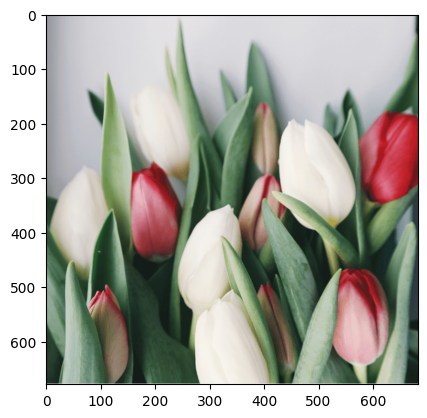

In [7]:
width, height = img.size

new_height = 679

left = 0
top = 0
right = width
bottom = new_height

cropped_img = img.crop((left, top, right, bottom))

plt.imshow(cropped_img)

In [8]:
import tensorflow as tf

In [9]:
# convert to RGB
rgb_image = cropped_img.convert(mode='RGB')
# convert Image object to Numpy array
reshaped_image = np.array(rgb_image)
reshaped_image

array([[[152, 153, 159],
        [152, 153, 159],
        [152, 153, 159],
        ...,
        [ 60,  93,  88],
        [ 46,  58,  65],
        [ 24,  44,  41]],

       [[145, 147, 151],
        [152, 153, 159],
        [152, 153, 159],
        ...,
        [ 60,  93,  88],
        [ 46,  58,  65],
        [ 24,  44,  41]],

       [[152, 153, 159],
        [152, 153, 159],
        [142, 157, 162],
        ...,
        [ 60,  93,  88],
        [ 46,  58,  65],
        [ 24,  44,  41]],

       ...,

       [[ 33,  55,  41],
        [ 33,  55,  41],
        [ 33,  55,  41],
        ...,
        [ 19,  28,  25],
        [ 19,  28,  25],
        [ 21,  34,  27]],

       [[ 33,  55,  41],
        [ 33,  55,  41],
        [ 33,  55,  41],
        ...,
        [ 21,  34,  27],
        [ 21,  34,  27],
        [ 21,  34,  27]],

       [[178, 194, 182],
        [178, 194, 182],
        [178, 194, 182],
        ...,
        [176, 176, 181],
        [176, 176, 181],
        [176, 176, 181]]

In [10]:
image = reshaped_image
print('Dimensions: ', image.shape)

Dimensions:  (679, 683, 3)


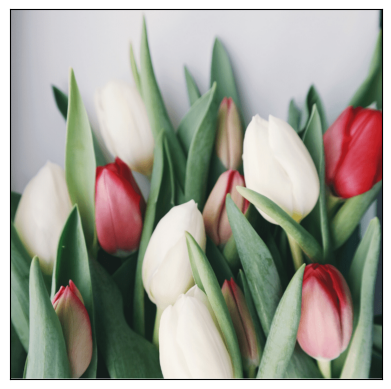

In [11]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)

In [12]:
images = []
images.append(image)

# Pre-process Images

In [13]:
import cv2

In [14]:
processed_images = []
for img in images:
    processed_images.append(cv2.resize(img, (224, 224)))
processed_images = np.array(processed_images)

Check pre-processed images

In [15]:
for image in processed_images:
  print('Dimensions: ', image.shape)

processed_images

Dimensions:  (224, 224, 3)


array([[[[152, 153, 159],
         [157, 158, 164],
         [156, 159, 165],
         ...,
         [196, 196, 202],
         [143, 157, 163],
         [ 46,  59,  66]],

        [[152, 153, 159],
         [153, 153, 159],
         [158, 159, 165],
         ...,
         [192, 194, 201],
         [129, 146, 151],
         [ 46,  59,  65]],

        [[151, 153, 159],
         [152, 153, 159],
         [153, 154, 160],
         ...,
         [191, 193, 200],
         [129, 146, 151],
         [ 46,  59,  65]],

        ...,

        [[ 37,  60,  45],
         [ 30,  57,  36],
         [ 30,  49,  37],
         ...,
         [ 21,  33,  27],
         [ 21,  34,  27],
         [ 21,  34,  27]],

        [[ 33,  55,  41],
         [ 30,  57,  36],
         [ 30,  49,  37],
         ...,
         [ 19,  29,  25],
         [ 21,  33,  27],
         [ 21,  34,  27]],

        [[ 33,  55,  41],
         [ 30,  49,  37],
         [ 30,  49,  37],
         ...,
         [ 21,  34,  27],
        

# Define CNN Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(20)
])

# Extract features from images

In [17]:
features = model.predict(processed_images)

1/1 [==============================] - 0s 320ms/step


In [18]:
features

array([[  3.51057  ,  22.722904 ,  -5.3501616,  35.381863 , -33.200127 ,
         42.596634 , -29.726696 ,   7.9879556,  -6.840484 , -13.429251 ,
         37.184486 ,   7.524575 , -38.338776 , -21.248758 ,  42.687157 ,
        -65.78584  , -10.366805 , -23.97984  ,  24.541813 , -36.811172 ]],
      dtype=float32)

In [19]:
from sklearn.cluster import KMeans

In [20]:
n_clusters = min(20, features.shape[0])
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1)

# Get cluster centers

In [21]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[  3.51057  ,  22.722904 ,  -5.3501616,  35.381863 , -33.200127 ,
         42.596634 , -29.726696 ,   7.9879556,  -6.840484 , -13.429251 ,
         37.184486 ,   7.524575 , -38.338776 , -21.248758 ,  42.687157 ,
        -65.78584  , -10.366805 , -23.97984  ,  24.541813 , -36.811172 ]],
      dtype=float32)

In [22]:
n_dims = cluster_centers.shape[-1]
n_dims

20

In [23]:
rgb_centers = np.clip(cluster_centers, 0, 255).astype(int)

In [24]:
rgb_centers

array([[ 3, 22,  0, 35,  0, 42,  0,  7,  0,  0, 37,  7,  0,  0, 42,  0,
         0,  0, 24,  0]])

In [25]:
palette = np.zeros((50, len(rgb_centers) * 50, 3), dtype=np.uint8)

In [26]:
start = 0

for color in rgb_centers:
    end = start + 50
    color = np.expand_dims(color, axis=0)
    color = np.repeat(color, 50, axis=0)
    color = np.repeat(color, 50, axis=1)
    color = np.tile(color, (1, 1, 3))
    palette[:, start:end, :] = color
    start = end

ValueError: ignored

# Display Palette

In [ ]:
import seaborn as sns
import colorsys

In [ ]:
palette = prevalent_colors
palette.sort(key=lambda rgb: (lambda r, g, b : colorsys.rgb_to_hsv(r, g, b))(*rgb))

In [ ]:
palette

In [ ]:
import plotly.express as px

In [ ]:
img_rgb = np.array([palette], dtype=np.uint8)
fig = px.imshow(img_rgb)

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

# LSTM

Prepare Data

In [27]:
# Load the color palette
color_palette = np.array([[0.2, 0.3, 0.4], [0.6, 0.1, 0.9], [0.5, 0.7, 0.2]])

# Normalize the color palette values to the range [0, 1]
color_palette_normalized = color_palette / 255.0

# Reshape the color palette to match LSTM input shape
color_palette_input = color_palette_normalized.reshape(1, -1, 3)

Build LSTM Model

In [28]:
# Define the LSTM model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(None, 3)))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

Train LSTM Model

In [29]:
# Generate color suggestions (assuming random values for demonstration)
color_suggestions = np.random.rand(5, 3)

# Normalize the color suggestions to the range [0, 1]
color_suggestions_normalized = color_suggestions / 255.0

# Reshape the color suggestions to match LSTM input shape
color_suggestions_input = color_suggestions_normalized.reshape(1, -1, 3)

# Train the LSTM model
model.fit(color_palette_input, color_suggestions_input, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.2478
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.2468
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 0.2458
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2447
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2436
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 0.2424
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2412
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2400
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2387
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2373


Generate color suggestions

In [30]:
# Generate color suggestions using the trained LSTM model
predicted_color_suggestions = model.predict(color_palette_input)

# Denormalize the predicted color suggestions to the original range [0, 255]
predicted_color_suggestions_denormalized = predicted_color_suggestions * 255.0

# Reshape the predicted color suggestions to the desired shape
predicted_color_suggestions_reshaped = predicted_color_suggestions_denormalized.reshape(-1, 3)

# Print the predicted color suggestions
print(predicted_color_suggestions_reshaped)


1/1 [==============================] - 1s 571ms/step
[[124.23041  124.43029  124.562904]]


# FCNN (Fully Convolutional Neural Network)

Prepare Data

In [31]:
image = cv2.imread("spring_flowers.png")

In [32]:
# Preprocess the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image / 255.0

In [34]:
palette_size = 5

Build FCN Model

In [35]:
# Define the FCN model architecture
model = tf.keras.Sequential()
# Add convolutional layers, pooling layers, etc.
# Define the output layer with the desired number of classes (e.g., for semantic segmentation)
num_classes = palette_size

model.add(tf.keras.layers.Conv2D(num_classes, kernel_size=(1, 1), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

Train FCN Model

In [36]:
# Prepare the ground truth segmentation mask
mask = cv2.imread('your_segmentation_mask.jpg', 0)
# Preprocess the mask (e.g., convert to one-hot encoding)

# Train the FCN model
model.fit(image, mask, epochs=10)

Epoch 1/10


ValueError: ignored